In [108]:
import os
from os import listdir
from os.path import isfile, join
import numpy as np
import pandas as pd
import glob, csv
import nltk
import re
import string
import seaborn as sns
from nltk.stem import WordNetLemmatizer
from sklearn import preprocessing
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.corpus import stopwords
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [109]:
authors = os.listdir('./data/C50train')
print(authors)
print(len(authors))

['AaronPressman', 'AlanCrosby', 'AlexanderSmith', 'BenjaminKangLim', 'BernardHickey', 'BradDorfman', 'DarrenSchuettler', 'DavidLawder', 'EdnaFernandes', 'EricAuchard', 'FumikoFujisaki', 'GrahamEarnshaw', 'HeatherScoffield', 'JaneMacartney', 'JanLopatka', 'JimGilchrist', 'JoeOrtiz', 'JohnMastrini', 'JonathanBirt', 'JoWinterbottom', 'KarlPenhaul', 'KeithWeir', 'KevinDrawbaugh', 'KevinMorrison', 'KirstinRidley', 'KouroshKarimkhany', 'LydiaZajc', "LynneO'Donnell", 'LynnleyBrowning', 'MarcelMichelson', 'MarkBendeich', 'MartinWolk', 'MatthewBunce', 'MichaelConnor', 'MureDickie', 'NickLouth', 'PatriciaCommins', 'PeterHumphrey', 'PierreTran', 'RobinSidel', 'RogerFillion', 'SamuelPerry', 'SarahDavison', 'ScottHillis', 'SimonCowell', 'TanEeLyn', 'TheresePoletti', 'TimFarrand', 'ToddNissen', 'WilliamKazer']
50


In [129]:
def dataframe_creation(path):
    labels = []
    docs = []
    path='./data/C50train/'
    for r, dirs, files in os.walk(path):
         for file in files:
               # print(file)
                with open(os.path.join(r, file), "r") as f:
                    author_text = f.read()
                    author_sentences = author_text.replace('.\n','')
                    docs.append(author_sentences)
                    labels.append(r.replace(path,''))

                    #author_sentences = author_text.split(".\n")
                    #for sentence in author_sentences:
                    #        sentence = sentence.replace('\n', '')
                    #        if sentence.__len__() > 0 and sentence.count(' ') > 1:
                    #            docs.append(sentence)
                    #            labels.append(r.replace(path,''))
                    
    data_dict = dict([('text', docs), ('author', labels)])
    df = pd.DataFrame(data_dict)
    le = preprocessing.LabelEncoder()
    df['author_label'] = le.fit_transform(df.author)
    df['id'] = df.index
    
    return df
                             
            

In [130]:
df_trainset=dataframe_creation('./data/C50train/')

In [131]:
print(df_trainset)

                                                   text         author  \
0     The Internet may be overflowing with new techn...  AaronPressman   
1     The U.S. Postal Service announced Wednesday a ...  AaronPressman   
2     Elementary school students with access to the ...  AaronPressman   
3     An influential Internet organisation has backe...  AaronPressman   
4     An influential Internet organisation has backe...  AaronPressman   
...                                                 ...            ...   
2495  China's central bank chief has said that infla...   WilliamKazer   
2496  China ushered in 1997, a year it has hailed as...   WilliamKazer   
2497  China issued tough new rules on the handling o...   WilliamKazer   
2498  China will avoid bold moves in tackling its ai...   WilliamKazer   
2499  Communist Party chief Jiang Zemin has put his ...   WilliamKazer   

      author_label    id  
0                0     0  
1                0     1  
2                0     2  
3  

In [106]:
eng_stopwords = set(stopwords.words("english"))
#df_trainset["num_words"] = df_trainset["text"].apply(lambda x: len(str(x).split()))
#df_trainset["num_unique_words"] = df_trainset["text"].apply(lambda x: len(set(str(x).split())))
#df_trainset["num_chars"] = df_trainset["text"].apply(lambda x: len(str(x)))
#df_trainset["num_stopwords"] = df_trainset["text"].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))
#df_trainset["num_punctuations"] =df_trainset['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]) )
#df_trainset["mean_word_len"] = df_trainset["text"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
#df_trainset["num_words_upper"] = df_trainset["text"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))


In [116]:
from nltk.tag import pos_tag
from nltk.corpus import wordnet
from nltk.corpus.reader.wordnet import VERB, NOUN, ADJ, ADV
from nltk.stem.wordnet import WordNetLemmatizer
from collections import Counter
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

stop_words = stopwords.words('english')
eng_stop_words=list(ENGLISH_STOP_WORDS)
my_stop_words=['fax']
eng_stop_words.extend(my_stop_words)
stopwords_dict = Counter(stop_words)
lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(treebank_tag):

    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
def stop_word_rem_and_lemmatization(text):
    lemm_text=[]
    from nltk.tokenize import word_tokenize
    #stop_words_cleaned_text=[word for word in text.split() if word not in stopwords_dict]
    
    
    for word,tag in pos_tag(text.split()):
        lemm_text.append(lemmatizer.lemmatize(word, get_wordnet_pos(tag)))
    lemm_text=[word for word in lemm_text if word not in eng_stop_words]
    return " ".join(lemm_text)

    

In [150]:
import nltk
from nltk.tokenize import word_tokenize
from string import punctuation  
from nltk.corpus import stopwords

def preprocessData(text):
    sentence=''
    #Text lemmatization and stop words removal
    sentence=stop_word_rem_and_lemmatization(text)
    
    for ch in punctuation+'0123456789$%-.,':
        sentence = sentence.replace(ch,' ')
        
    #remove all characters less than or equal to two characters
    sentence=re.sub(r'\b\w{1,2}\b', '', text)
    
    #remove all digits
    sentence = ''.join([i for i in sentence if not i.isdigit()])
    
    #remove multiple whitespaces
    sentence= re.sub(' +', ' ', sentence)
            
    return sentence
            

In [151]:
df_trainset["preprocessed_text"] = df_trainset["text"].apply(lambda x: preprocessData(str(x)))


In [152]:
print(df_trainset['preprocessed_text'])

0       The Internet may overflowing with new technolo...
1       The .. Postal Service announced Wednesday plan...
2       Elementary school students with access the Int...
3        influential Internet organisation has backed ...
4        influential Internet organisation has backed ...
                              ...                        
2495    China' central bank chief has said that inflat...
2496    China ushered , year has hailed one the most s...
2497    China issued tough new rules the handling bloo...
2498    China will avoid bold moves tackling its ailin...
2499    Communist Party chief Jiang Zemin has put his ...
Name: preprocessed_text, Length: 2500, dtype: object


In [153]:
df_testset=dataframe_creation('./data/C50test/')

In [154]:
df_testset["preprocessed_text"] = df_testset["text"].apply(lambda x: preprocessData(str(x)))


In [155]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
vectorizer_tf=TfidfVectorizer(norm = 'l2',min_df = 0, use_idf = True, smooth_idf = False, sublinear_tf = True,
                             ngram_range=(2,3), max_features = 15000,token_pattern=r'\b\w+\b')

train_matrix_tf_idf = vectorizer_tf.fit_transform(df_trainset['preprocessed_text'])
test_matrix_tf_idf = vectorizer_tf.transform(df_testset["preprocessed_text"])

print((train_matrix_tf_idf.shape))

(2500, 15000)


Text(0.5, 0, '$\\chi^2$')

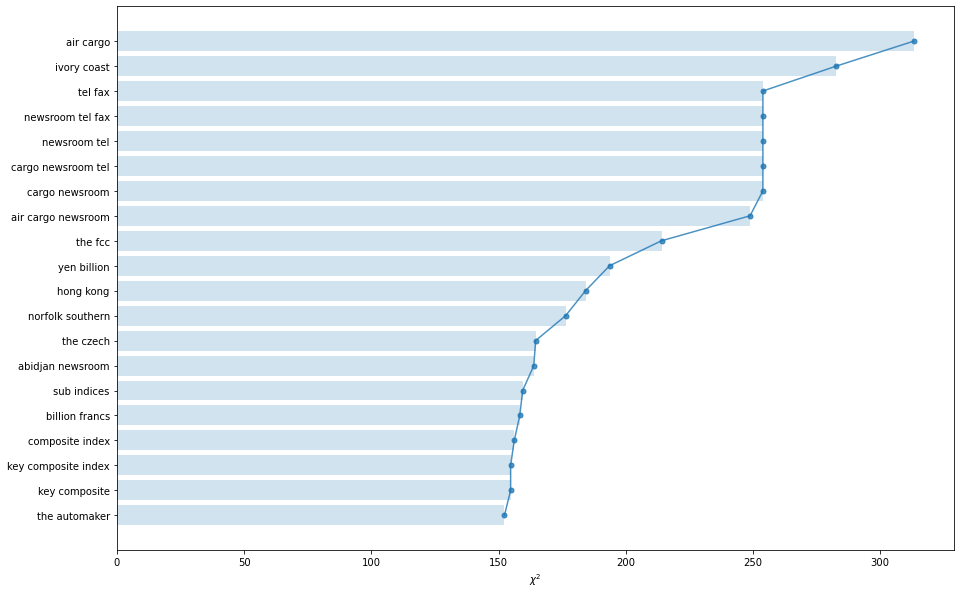

In [156]:
from sklearn.feature_selection import chi2,SelectKBest
from matplotlib import pyplot as plt
chi2score = chi2(train_matrix_tf_idf, df_trainset['author_label'])[0]

plt.figure(figsize=(15,10))
wscores = zip(vectorizer_tf.get_feature_names(), chi2score)
wchi2 = sorted(wscores, key=lambda x:x[1])
topchi2 = list(zip(*wchi2[-20:]))
x = range(len(topchi2[1]))
labels = topchi2[0]
plt.barh(x,topchi2[1], align='center', alpha=0.2)
plt.plot(topchi2[1], x, '-o', markersize=5, alpha=0.8)
plt.yticks(x, labels)
plt.xlabel('$\chi^2$')

In [184]:


#chi2score = chi2(train_matrix, y_train)[0]
ch2 = SelectKBest(chi2, k=8000)
train_matrix_chi2 = ch2.fit_transform(train_matrix_tf_idf,df_trainset['author_label'])
test_matrix_chi2 = ch2.transform(test_matrix_tf_idf)
print(train_matrix_chi2.shape)

(2500, 8000)


In [185]:
X_train_vectorizors=[train_matrix_tf_idf,train_matrix_chi2]
X_test_vectorizors=[test_matrix_tf_idf,test_matrix_chi2]
X_labels=['TF-IDF','TF-IDF + CHI2 ']
y_train = df_trainset['author_label']
y_test = df_testset['author_label']


In [186]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
acc_list=[]
prec_list=[]
f1_list=[]
acc_all_model=[]
k=23
cat_names = ['True -ve','False +ve','False -ve','True +ve']

for i in range(2):
    X_train = X_train_vectorizors[i]
    X_test = X_test_vectorizors[i]
    print("----------------------------------------------")
    print("FOR VECTORIZOR "+X_labels[i])

    for m in [#'manhattan',
              'euclidean','cosine']:

        classifier = KNeighborsClassifier(n_neighbors=k,algorithm='auto',metric=m) #Using brute-force algorithm for quicker computation.
        classifier.fit(X_train, y_train) #Fitting the built-in sklearn classifier on our training data
        predicted_label = classifier.predict(X_test) #Making the classifier to predict on the previously unseen test data.

        confusion_mat = confusion_matrix(y_test, predicted_label)
        class_report = classification_report(y_test, predicted_label)
        class_report_dict = classification_report(y_test, predicted_label,output_dict=True)
        acc_list.append({m:np.round(class_report_dict['accuracy']*100,2)})
        f1_list.append({m:np.round(class_report_dict['weighted avg']['f1-score']*100,2)})
        prec_list.append({m:np.round(class_report_dict['weighted avg']['precision']*100,2)})
        if(i==2 and m=='cosine'):
            acc_all_model.append({'knn':np.round(class_report_dict['accuracy']*100,2)})
        print("\nClassification Report for metric = {} is:\n".format(m))
        print(class_report)

----------------------------------------------
FOR VECTORIZOR TF-IDF

Classification Report for metric = euclidean is:

              precision    recall  f1-score   support

           0       0.78      0.86      0.82        50
           1       0.71      0.82      0.76        50
           2       0.68      0.60      0.64        50
           3       0.47      0.80      0.59        50
           4       0.71      0.82      0.76        50
           5       0.69      0.62      0.65        50
           6       0.87      0.78      0.82        50
           7       0.65      0.82      0.73        50
           8       0.78      0.70      0.74        50
           9       0.83      0.68      0.75        50
          10       0.93      1.00      0.96        50
          11       0.73      0.92      0.81        50
          12       0.90      0.92      0.91        50
          13       0.71      0.60      0.65        50
          14       0.48      0.56      0.52        50
          15   


Classification Report for metric = cosine is:

              precision    recall  f1-score   support

           0       0.77      0.88      0.82        50
           1       0.71      0.84      0.77        50
           2       0.69      0.50      0.58        50
           3       0.48      0.76      0.59        50
           4       0.73      0.82      0.77        50
           5       0.74      0.74      0.74        50
           6       0.91      0.86      0.89        50
           7       0.72      0.88      0.79        50
           8       0.81      0.70      0.75        50
           9       0.76      0.68      0.72        50
          10       0.91      1.00      0.95        50
          11       0.77      0.92      0.84        50
          12       0.92      0.98      0.95        50
          13       0.78      0.62      0.69        50
          14       0.56      0.66      0.61        50
          15       0.93      1.00      0.96        50
          16       0.61      0.96

In [187]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_matrix_chi2,y_train)
predictions_lr = lr.predict(test_matrix_chi2)

In [188]:
print(classification_report(predictions_lr,y_test))
class_report_dict_lr = classification_report(y_test, predictions_lr,output_dict=True)
acc_all_model.append({'logistic Regression':np.round(class_report_dict_lr['accuracy']*100,2)})

              precision    recall  f1-score   support

           0       0.98      0.91      0.94        54
           1       0.98      1.00      0.99        49
           2       0.88      0.98      0.93        45
           3       0.94      0.78      0.85        60
           4       0.96      0.98      0.97        49
           5       0.90      1.00      0.95        45
           6       0.96      0.96      0.96        50
           7       0.90      0.94      0.92        48
           8       1.00      0.94      0.97        53
           9       0.92      1.00      0.96        46
          10       1.00      1.00      1.00        50
          11       0.96      0.92      0.94        52
          12       0.98      1.00      0.99        49
          13       0.96      0.91      0.93        53
          14       0.82      0.84      0.83        49
          15       1.00      1.00      1.00        50
          16       0.98      0.91      0.94        54
          17       1.00    

In [189]:
from sklearn.naive_bayes import MultinomialNB
nby = MultinomialNB()
nby.fit(train_matrix_chi2,y_train)
predictions_nbm=nby.predict(test_matrix_chi2)
print(classification_report(predictions_nbm,y_test))
class_report_dict_nb = classification_report(y_test, predictions_nbm,output_dict=True)
#acc_all_model.append({'Naive Bayes':np.round(class_report_dict_nb['accuracy']*100,2)})

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        50
           1       0.98      0.98      0.98        50
           2       0.88      0.98      0.93        45
           3       0.92      0.72      0.81        64
           4       0.96      0.98      0.97        49
           5       0.88      1.00      0.94        44
           6       0.96      0.98      0.97        49
           7       1.00      0.82      0.90        61
           8       0.98      0.96      0.97        51
           9       0.90      1.00      0.95        45
          10       1.00      1.00      1.00        50
          11       0.98      0.91      0.94        54
          12       1.00      1.00      1.00        50
          13       0.92      0.94      0.93        49
          14       0.84      0.81      0.82        52
          15       1.00      1.00      1.00        50
          16       1.00      0.82      0.90        61
          17       0.98    

In [190]:
from sklearn import svm
svm = svm.SVC(probability=True, kernel="linear")
svm.fit(train_matrix_chi2,y_train)
prediction_svm = svm.predict(test_matrix_chi2)
print(classification_report(prediction_svm,y_test))
class_report_dict_svm = classification_report(y_test, prediction_svm,output_dict=True)
#acc_all_model.append({'SVM':np.round(class_report_dict_svm['accuracy']*100,2)})

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.96      1.00      0.98        48
           2       0.96      0.94      0.95        51
           3       0.94      0.82      0.88        57
           4       1.00      1.00      1.00        50
           5       0.96      0.98      0.97        49
           6       1.00      0.96      0.98        52
           7       0.88      1.00      0.94        44
           8       1.00      0.93      0.96        54
           9       0.94      0.98      0.96        48
          10       1.00      1.00      1.00        50
          11       0.98      0.96      0.97        51
          12       1.00      1.00      1.00        50
          13       0.96      0.94      0.95        51
          14       0.90      0.98      0.94        46
          15       1.00      1.00      1.00        50
          16       0.98      1.00      0.99        49
          17       1.00    